In [1]:
import pydicom as dicom
import numpy as np
import matplotlib.pyplot as plt
import os
import glob


In [2]:
path = 'D:\\ILBS_14_8_21_Sanjeev\\Ilbs_14-08-2021\\SynapseMediaSets_009109\\Syn20210722115557\\DICOMOBJ'

Ct_images  = os.listdir(path)

In [3]:
slices = [dicom.read_file(path+'/'+s, force=True) for s in Ct_images]


In [4]:
slices[498]

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 186
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113845.13.7089.3871204585.6255444426
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.840.113845.1.1
(0002, 0013) Implementation Version Name         SH: 'Syn4,4,1,1'
(0002, 0016) Source Application Entity Title     AE: 'ct99'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 726
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'LOCALIZER']
(0008, 0012) Instance Creation Date              DA: '201

In [31]:
slices = sorted(slices, key=lambda x:x[0].ImagePositionPatient[2])

KeyError: (0000, 0000)

In [6]:
slices[12].ImagePositionPatient[2]

'-142.25'

In [7]:
len(slices)

1347

In [8]:
for i in range(1347):
    print(slices[i].ImagePositionPatient[2])

-127.250
-128.500
-129.750
-131.000
-132.250
-133.500
-134.750
-136.000
-137.250
-138.500
-139.750
-141.000
-142.250
-143.500
-144.750
-146.000
-147.250
-148.500
-149.750
-151.000
-152.250
-153.500
-154.750
-156.000
-157.250
-158.500
-159.750
-161.000
-162.250
-163.500
-164.750
-166.000
-167.250
-168.500
-169.750
-171.000
-172.250
-173.500
-174.750
-176.000
-177.250
-178.500
-179.750
-181.000
-182.250
-183.500
-184.750
-186.000
-187.250
-188.500
-189.750
-191.000
64.000
62.750
61.500
60.250
-192.250
-193.500
-194.750
-196.000
-197.250
-198.500
-199.750
-201.000
-202.250
-203.500
-204.750
-206.000
-207.250
59.000
57.750
56.500
55.250
54.000
52.750
51.500
50.250
49.000
47.750
46.500
45.250
44.000
42.750
-208.500
-209.750
-211.000
-212.250
-213.500
-214.750
-216.000
-217.250
-218.500
-219.750
-221.000
-222.250
-223.500
41.500
40.250
39.000
37.750
36.500
35.250
34.000
32.750
31.500
30.250
29.000
27.750
26.500
25.250
-224.750
-226.000
-227.250
-228.500
-229.750
-231.000
-232.250
-233.500
-2

AttributeError: 'FileDataset' object has no attribute 'ImagePositionPatient'

In [9]:
slices[499].PixelSpacing

[0.545455, 0.596847]

In [10]:
pixel_spacing = slices[0].PixelSpacing
slice_thickness = slices[0].SliceThickness

In [21]:
slices[0].PixelSpacing

[0.681641, 0.681641]

In [11]:
axial_aspect_ratio = pixel_spacing[1]/pixel_spacing[0]
sagital_aspect_ratio = pixel_spacing[1]/slice_thickness
coronal_aspect_ratio = slice_thickness/pixel_spacing[0]

In [12]:
print(pixel_spacing)
print(slice_thickness)
print(axial_aspect_ratio)
print(sagital_aspect_ratio)
print(coronal_aspect_ratio)

[0.681641, 0.681641]
1.250000
1.0
0.5453128
1.8338098793939916


In [13]:
image_shape = list(slices[0].pixel_array.shape)
image_shape.append(len(slices))
volume3d = np.zeros(image_shape)

In [14]:
for i,s in enumerate(slices):
    array2d = s.pixel_array
    if i==498 or i==499:
        pass
    else:
        #print("Index",i,array2d.shape)
        volume3d[:,:,i] = array2d

In [15]:
print(array2d.shape)
print(volume3d.shape)

(512, 512)
(512, 512, 1347)


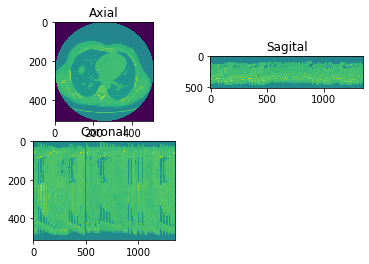

In [16]:
axial = plt.subplot(2,2,1)
plt.title('Axial')
plt.imshow(volume3d[:,:,image_shape[2]//2])
axial.set_aspect(axial_aspect_ratio)

sagital = plt.subplot(2,2,2)
plt.title("Sagital")
plt.imshow(volume3d[:,image_shape[1]//2,:])
sagital.set_aspect(sagital_aspect_ratio)

coronal = plt.subplot(2,2,3)
plt.title("Coronal")
plt.imshow(volume3d[image_shape[0]//2,:,:])
coronal.set_aspect(coronal_aspect_ratio)
plt.show()